## Connect to Google Drive

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
import pandas as pd

file = '/content/drive/MyDrive/Colab Notebooks/Introducing Callbacks and Dropouts/cancer_classification.csv'
data = pd.read_csv(file)

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Exploration

In [232]:
# Checking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- None of the data points are null. All 569 values have non null count.
- All the features are float64 data type.

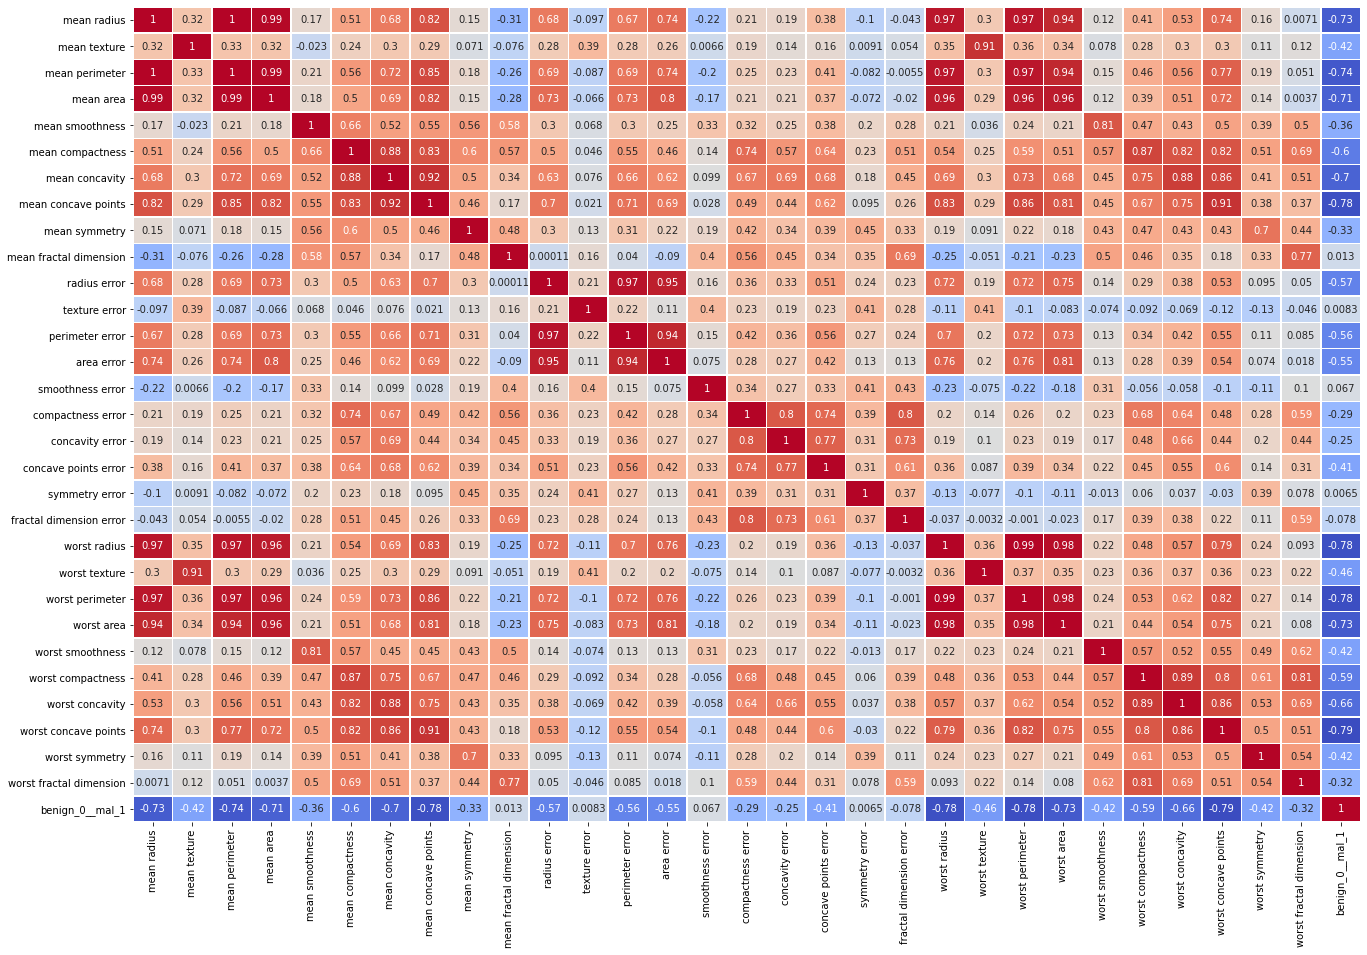

In [233]:
# Checking the correlation amongst all the features.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 15))
correlation = data.corr()
sns.heatmap(correlation, annot=True, linewidths=.5, cmap="coolwarm", cbar=False);

In [234]:
data.describe().transpose()[['mean', 'min', 'max', 'std']][:-1]

,mean,min,max,std
mean radius,14.127292,6.981000,28.11000,3.524049
mean texture,19.289649,9.710000,39.28000,4.301036
mean perimeter,91.969033,43.790000,188.50000,24.298981
mean area,654.889104,143.500000,2501.00000,351.914129
mean smoothness,0.096360,0.052630,0.16340,0.014064
mean compactness,0.104341,0.019380,0.34540,0.052813
mean concavity,0.088799,0.000000,0.42680,0.079720
mean concave points,0.048919,0.000000,0.20120,0.038803
mean symmetry,0.181162,0.106000,0.30400,0.027414
mean fractal dimension,0.062798,0.049960,0.09744,0.007060


## Data Preprocessing

In [235]:
from sklearn.preprocessing import MinMaxScaler

X = data[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]

y = data['benign_0__mal_1']

trans = MinMaxScaler()
X = trans.fit_transform(X)

print('-'*50)
print(f'Sample transformed X:\n {X[0]}')
print('-'*50)

--------------------------------------------------
Sample transformed X:
 [0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
 0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
 0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
 0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
 0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
--------------------------------------------------


In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print('-'*50)
print(f'Shape X_train: {X_train.shape} - (rows, columns)')
print(f'Shape y_train: {y_train.shape} - (rows, columns)')
print(f'Shape X_test: {X_test.shape} - (rows, columns)')
print(f'Shape y_test: {y_test.shape} - (rows, columns)')
print('-'*50)

--------------------------------------------------
Shape X_train: (398, 30) - (rows, columns)
Shape y_train: (398,) - (rows, columns)
Shape X_test: (171, 30) - (rows, columns)
Shape y_test: (171,) - (rows, columns)
--------------------------------------------------


## Building Neural Networks

In [237]:
import warnings
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.metrics import Accuracy

warnings.filterwarnings("ignore")

In [238]:
feature_layer = Input(shape=(30,))

layer1 = layers.Dense(32, kernel_initializer=HeNormal(), activation='relu')(feature_layer)
layer2 = layers.Dense(16, kernel_initializer=HeNormal(), activation='relu')(layer1)
layer3 = layers.Dense(8, kernel_initializer=HeNormal(), activation='relu')(layer2)
layer4 = layers.Dense(4, kernel_initializer=HeNormal(), activation='relu')(layer3)
output = layers.Dense(1, kernel_initializer=HeNormal(), activation='sigmoid')(layer4)

model = Model(inputs=feature_layer, outputs=output)

model.compile(optimizer = Adam(), loss="binary_crossentropy")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

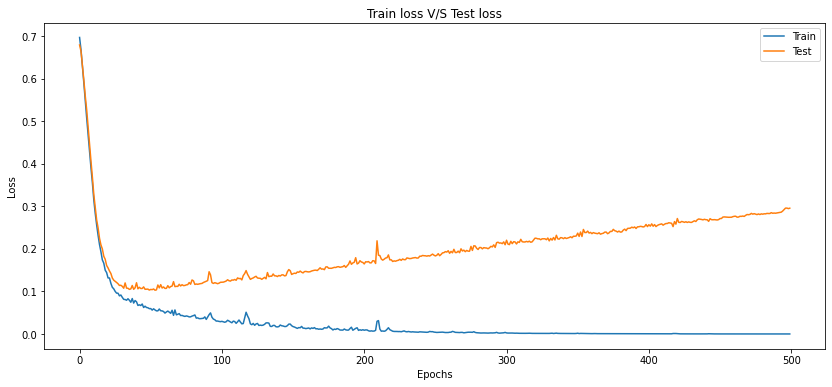

In [239]:
import matplotlib.pyplot as plt

model_history = pd.DataFrame(model.history.history)

plt.figure(figsize=(14, 6))
plt.plot(model_history[['loss', 'val_loss']]);
plt.title('Train loss V/S Test loss')
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.legend('best', labels=['Train', 'Test']);

In the *loss graph*, Notice in the beginning during the first couple of epochs both validation and  are both decreasing which looks perfect. And as we go  we're decreasing loss in both the validation set and the training set. However at a certain point in time notice that our training loss here in blue is still going down. However our validation loss is beginning to increase. Which indicates that we are oerfitting to our training data. It means the we have trained too much. To avoid the we can use *early stopping*. Early stpping prevents from overfitting and stops training before the situation worsens and goes out of hand.

In [240]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def get_predicted_labels(predictions):
  predicted_labels = []
  for i in predictions:
    if i < 0.5:
      predicted_labels.append(0)
    else:
      predicted_labels.append(1)
      
  return predicted_labels

## Callbacks

We are monitoring val_loss here and we want to minimize it. Losses are supposed to be minimized. Similarly if monitor was set to accuracy we were supposed to maximize it. In the below case we are tracking validation loss. Patience means waiting or monitor if there is any change. Example if patience is set to 25 it means that waiting or monitoring time will be 25 epochs.

In [242]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_loss = EarlyStopping(monitor='val_loss', mode='min', patience=10)

feature_layer = Input(shape=(30,))

layer1 = layers.Dense(30, kernel_initializer=HeNormal(), activation='relu')(feature_layer)
layer2 = layers.Dense(15, kernel_initializer=HeNormal(), activation='relu')(layer1)
output = layers.Dense(1, kernel_initializer=HeNormal(), activation='sigmoid')(layer2)

model = Model(inputs=feature_layer, outputs=output)

model.compile(optimizer = Adam(), loss="binary_crossentropy")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop], verbose=0)

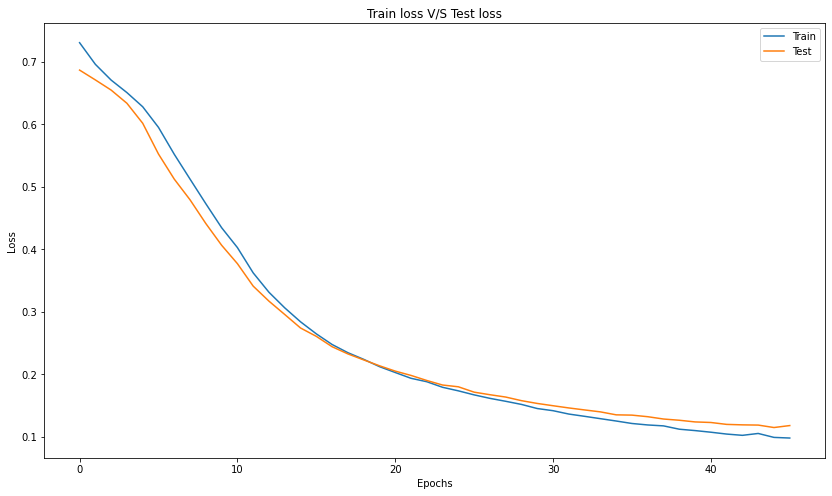

In [243]:
model_history = pd.DataFrame(model.history.history)

plt.figure(figsize=(14, 8))
plt.plot(model_history[['loss', 'val_loss']]);
plt.title('Train loss V/S Test loss')
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.legend('best', labels=['Train', 'Test']);

Early Stop got triggered at the 39th epoch. 

## Dropouts

A Simple Way to Prevent Neural Networks from Overfitting, Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training.

In [257]:
from tensorflow.keras.layers import Dropout

feature_layer = Input(shape=(30,))

layer1 = layers.Dense(30, kernel_initializer=HeNormal(), activation='relu')(feature_layer)
layer2 = Dropout(0.5)(layer1)
layer3 = layers.Dense(15, kernel_initializer=HeNormal(), activation='relu')(layer2)
layer4 = Dropout(0.5)(layer3)
output = layers.Dense(1, kernel_initializer=HeNormal(), activation='sigmoid')(layer4)

model = Model(inputs=feature_layer, outputs=output)

model.compile(optimizer = Adam(), loss="binary_crossentropy")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

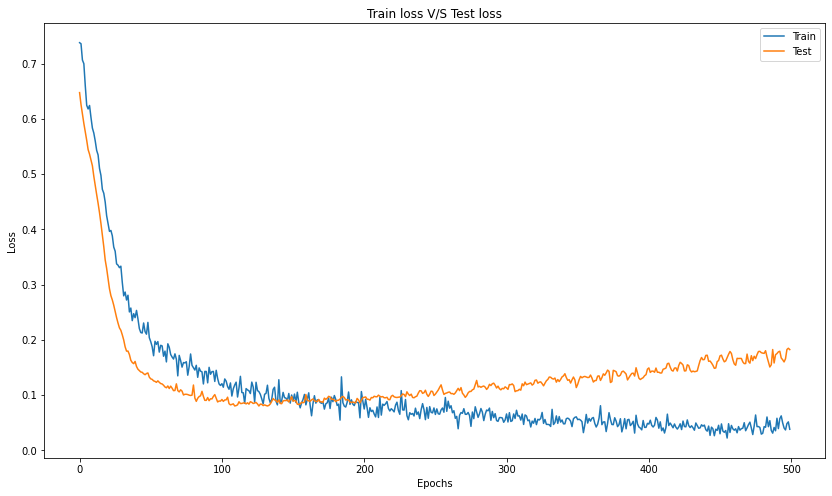

In [246]:
model_history = pd.DataFrame(model.history.history)

plt.figure(figsize=(14, 8))
plt.plot(model_history[['loss', 'val_loss']]);
plt.title('Train loss V/S Test loss')
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.legend('best', labels=['Train', 'Test']);

## Dropouts and Callbacks

In [254]:
feature_layer = Input(shape=(30,))

early_stop_loss = EarlyStopping(monitor='val_loss', mode='min', patience=10)

layer1 = layers.Dense(30, kernel_initializer=HeNormal(), activation='relu')(feature_layer)
layer2 = Dropout(0.4)(layer1)
layer3 = layers.Dense(15, kernel_initializer=HeNormal(), activation='relu')(layer2)
layer4 = Dropout(0.4)(layer3)
output = layers.Dense(1, kernel_initializer=HeNormal(), activation='sigmoid')(layer4)

model = Model(inputs=feature_layer, outputs=output)

model.compile(optimizer = Adam(), loss="binary_crossentropy")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0, callbacks=[early_stop])

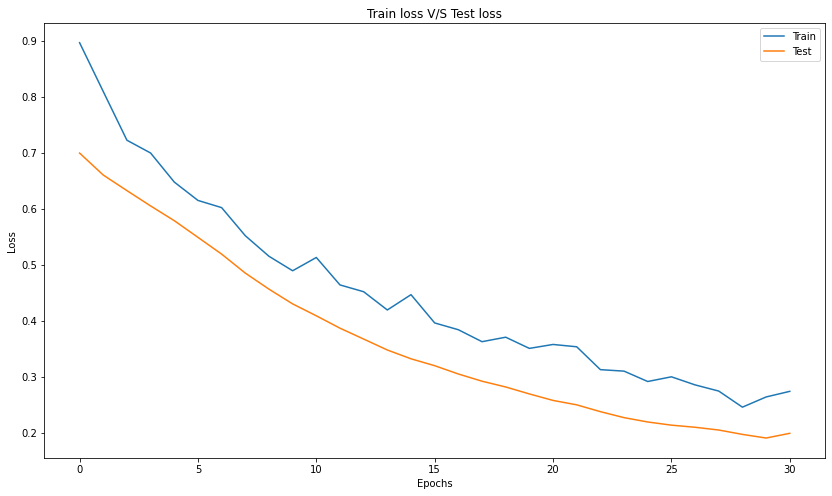

In [255]:
model_history = pd.DataFrame(model.history.history)

plt.figure(figsize=(14, 8))
plt.plot(model_history[['loss', 'val_loss']]);
plt.title('Train loss V/S Test loss')
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.legend('best', labels=['Train', 'Test']);